# Python for DS - Lab 3

### Solal ZANA and Adam BERDAH

### Exercise 1: Training a model and tuning its hyperparameter

#### Q1

Predicting the number of passengers on a given flight is a **regression** problem because the target variable is continuous. This is also a **supervised learning** problem, as the model would be trained on historical data with known numbers of passengers to be able to learn to predict that value based on new inputs.

#### Q2

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/solalzana/Desktop/DSB PDS/Lab3 - sklearn & hyperparams tuning/data/train.csv.bz2")
df.dropna(inplace=True) # in case they were any missing value (there are none)
df

DateOfDeparture Departure Arrival  WeeksToDeparture    log_PAX    std_wtd
0         2012-06-19       ORD     DFW         12.875000  12.331296   9.812647
1         2012-09-10       LAS     DEN         14.285714  10.775182   9.466734
2         2012-10-05       DEN     LAX         10.863636  11.083177   9.035883
3         2011-10-09       ATL     ORD         11.480000  11.169268   7.990202
4         2012-02-21       DEN     SFO         11.450000  11.269364   9.517159
...              ...       ...     ...               ...        ...        ...
8897      2011-10-02       DTW     ATL          9.263158  10.427055   7.316967
8898      2012-09-25       DFW     ORD         12.772727  12.201552  10.641034
8899      2012-01-19       SFO     LAS         11.047619  10.508746   7.908705
8900      2013-02-03       ORD     PHL          6.076923  10.174042   4.030334
8901      2011-11-26       DTW     ATL          9.526316   9.202674   6.167733

[8902 rows x 6 columns]

The columns have different types: datetime, then categorical variables for Departure and Arrival ( as they are string values), and numerical variables for log_PAX and std_wtd.

#### Q3

In [3]:
from pandas.tseries.holiday import USFederalHolidayCalendar

df['DateOfDeparture'] = pd.to_datetime(df['DateOfDeparture'])  # Convert to proper dates 

# Create new columns
df['day'] = df['DateOfDeparture'].dt.day
df['weekday'] = df['DateOfDeparture'].dt.weekday + 1
df['week'] = df['DateOfDeparture'].dt.isocalendar().week
df['month'] = df['DateOfDeparture'].dt.month
df['year'] = df['DateOfDeparture'].dt.year


holidays = USFederalHolidayCalendar().holidays(start=min(df['DateOfDeparture']), end=max(df['DateOfDeparture']))
df['holiday'] = (df['DateOfDeparture'].isin(holidays)).astype(int)
df['weekend'] = (df['DateOfDeparture'].dt.weekday >= 5).astype(int) # 1 if it's saturday or sunday
print((df['holiday'] == 1).sum()) # 309 holiday days
print((df['weekend'] == 1).sum()) # 2497 weekend days
df

309
2497


DateOfDeparture Departure Arrival  WeeksToDeparture    log_PAX  \
0         2012-06-19       ORD     DFW         12.875000  12.331296   
1         2012-09-10       LAS     DEN         14.285714  10.775182   
2         2012-10-05       DEN     LAX         10.863636  11.083177   
3         2011-10-09       ATL     ORD         11.480000  11.169268   
4         2012-02-21       DEN     SFO         11.450000  11.269364   
...              ...       ...     ...               ...        ...   
8897      2011-10-02       DTW     ATL          9.263158  10.427055   
8898      2012-09-25       DFW     ORD         12.772727  12.201552   
8899      2012-01-19       SFO     LAS         11.047619  10.508746   
8900      2013-02-03       ORD     PHL          6.076923  10.174042   
8901      2011-11-26       DTW     ATL          9.526316   9.202674   

        std_wtd  day  weekday  week  month  year  holiday  weekend  
0      9.812647   19        2    25      6  2012        0        0  
1      9.466734   10        1    37      9  2012        0        0  
2      9.035883    5        5    40     10  2012        0        0  
3      7.990202    9        7    40     10  2011        0        1  
4      9.517159   21        2     8      2  2012        0        0  
...         ...  ...      ...   ...    ...   ...      ...      ...  
8897   7.316967    2        7    39     10  2011        0        1  
8898  10.641034   25        2    39      9  2012        0        0  
8899   7.908705   19        4     3      1  2012        0        0  
8900   4.030334    3        7     5      2  2013        0        1  
8901   6.167733   26        6    47     11  2011        0        1  

[8902 rows x 13 columns]

In [4]:
# !pip install ydata_profiling

In [5]:
from ydata_profiling import ProfileReport
ProfileReport(df, title="Sample Data Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Q4

In [6]:
# Selecting numerical features
df.dtypes
numerical_features = df.select_dtypes(include=['int', 'float']).columns.tolist() # tolist to remove the Index() when printing
print(f"Numerical features : {numerical_features}", )
df2 = df.select_dtypes(include=['int', 'float'])
df2

Numerical features : ['WeeksToDeparture', 'log_PAX', 'std_wtd', 'day', 'weekday', 'month', 'year', 'holiday', 'weekend']


WeeksToDeparture    log_PAX    std_wtd  day  weekday  month  year  \
0            12.875000  12.331296   9.812647   19        2      6  2012   
1            14.285714  10.775182   9.466734   10        1      9  2012   
2            10.863636  11.083177   9.035883    5        5     10  2012   
3            11.480000  11.169268   7.990202    9        7     10  2011   
4            11.450000  11.269364   9.517159   21        2      2  2012   
...                ...        ...        ...  ...      ...    ...   ...   
8897          9.263158  10.427055   7.316967    2        7     10  2011   
8898         12.772727  12.201552  10.641034   25        2      9  2012   
8899         11.047619  10.508746   7.908705   19        4      1  2012   
8900          6.076923  10.174042   4.030334    3        7      2  2013   
8901          9.526316   9.202674   6.167733   26        6     11  2011   

      holiday  weekend  
0           0        0  
1           0        0  
2           0        0  
3           0        1  
4           0        0  
...       ...      ...  
8897        0        1  
8898        0        0  
8899        0        0  
8900        0        1  
8901        0        1  

[8902 rows x 9 columns]

#### Q5

The **Root Mean Squared Error (RMSE)** measures the average magnitude of the errors between predicted values from our model and actual values. Its particularity is that it is sensible to large values as it squares the differenceds. Thus, it penalizes larger errors more heavily than smaller ones which makes it very useful when large errors are our priority. It is also relavant as it's applicable (and most commonly used for) regression tasks and the value we get is in the same unit as our target variable.

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}
$$

For this regression task, we will use the built-in `sklearn` function to compute the RMSE.

#### Q6

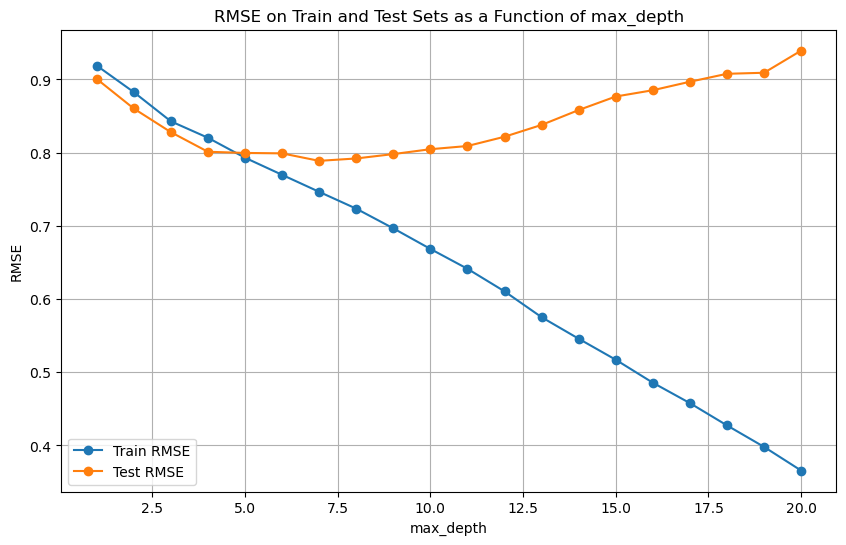

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
%matplotlib inline
import matplotlib.pyplot as plt

X = df2.drop(columns=['log_PAX'])
y = df2['log_PAX']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4839) # train-test split

# Training the DecisionTree regressor with different max_depth values and calculating RMSE
train_rmse = []
test_rmse = []
max_depth_range = range(1, 21)

for max_depth in max_depth_range:
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=4839)
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate RMSE for train and test sets
    train_rmse.append(root_mean_squared_error(y_train, y_train_pred))
    test_rmse.append(root_mean_squared_error(y_test, y_test_pred))

# Plotting RMSE as a function of max_depth
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.plot(max_depth_range, train_rmse, label='Train RMSE', marker='o')
plt.plot(max_depth_range, test_rmse, label='Test RMSE', marker='o')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('RMSE on Train and Test Sets as a Function of max_depth')
plt.legend()
plt.grid()
plt.show()

In [8]:
optimal_depth = np.argmin(test_rmse) + 1 # + 1 as it returns the index value, not the actual argmin
optimal_depth

7

#### Q7

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Without Standard Scaler
pipeline_no_scaler = Pipeline([
    ('regressor', DecisionTreeRegressor(max_depth=optimal_depth, random_state=4839)) # to avoid unnecessary computations
])

# With Standard Scaler
pipeline_with_scaler = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(max_depth=optimal_depth, random_state=4839)) # to avoid unnecessary computations
])

pipeline_no_scaler.fit(X_train, y_train)
pipeline_with_scaler.fit(X_train, y_train)

y_pred_no_scaler = pipeline_no_scaler.predict(X_test)
y_pred_with_scaler = pipeline_with_scaler.predict(X_test)

rmse_no_scaler = root_mean_squared_error(y_test, y_pred_no_scaler)
rmse_with_scaler = root_mean_squared_error(y_test, y_pred_with_scaler)


print(f"RMSE without StandardScaler: {rmse_no_scaler:.4f}")
print(f"RMSE with StandardScaler: {rmse_with_scaler:.4f}")

RMSE without StandardScaler: 0.7886
RMSE with StandardScaler: 0.7886


We notice that both errors are the same. This is because decision trees split data based on thresholds, so the scale of the features doesn't really matter, thus the standard scaler does not have any effect on the model output.

#### Q8

In [10]:
# Linear Regression model with and without StandardScaler, with and without intercept

from sklearn.linear_model import LinearRegression

linreg_no_scaler = Pipeline([
    ('regressor', LinearRegression(fit_intercept=True))
])

linreg_with_scaler = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression(fit_intercept=True))
])

linreg_no_scaler2 = Pipeline([
    ('regressor', LinearRegression(fit_intercept=False))
])

linreg_with_scaler2 = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression(fit_intercept=False))
])

linreg_no_scaler.fit(X_train, y_train)
linreg_with_scaler.fit(X_train, y_train)
linreg_no_scaler2.fit(X_train, y_train)
linreg_with_scaler2.fit(X_train, y_train)

y_pred_no_scaler = linreg_no_scaler.predict(X_test)
y_pred_with_scaler = linreg_with_scaler.predict(X_test)
y_pred_no_scaler2 = linreg_no_scaler2.predict(X_test)
y_pred_with_scaler2 = linreg_with_scaler2.predict(X_test)

rmse_no_scaler = root_mean_squared_error(y_test, y_pred_no_scaler)
rmse_with_scaler = root_mean_squared_error(y_test, y_pred_with_scaler)
rmse_no_scaler2 = root_mean_squared_error(y_test, y_pred_no_scaler2)
rmse_with_scaler2 = root_mean_squared_error(y_test, y_pred_with_scaler2)

print(f"RMSE without StandardScaler: {rmse_no_scaler:.4f}")
print(f"RMSE with StandardScaler: {rmse_with_scaler:.4f}")
print(f"RMSE without StandardScaler & no Intercept : {rmse_no_scaler2:.4f}")
print(f"RMSE with StandardScaler & no Intercept: {rmse_with_scaler2:.4f}")

RMSE without StandardScaler: 0.8676
RMSE with StandardScaler: 0.8676
RMSE without StandardScaler & no Intercept : 0.8728
RMSE with StandardScaler & no Intercept: 11.0218


fit_intercept=True (default): Includes an intercept term, which is often helpful in fitting the data more accurately.
fit_intercept=False: Excludes the intercept, forcing the model to pass through the origin, which is useful in specific cases where the data is already centered or domain knowledge dictates this relationship.

Here, the scaling seems to have little to no effect on the model error when there is an intercept found by the model. By curiosity, we tested out without an Intercept and saw a consequent difference with and without scaling. This can be due to the fact that x=0 does not naturally correspond to y=0 in our data.

#### Q9

In [11]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = df.select_dtypes(include=['object']).columns
categorical_data = df[categorical_features]
print(categorical_features)

encoder = OneHotEncoder()

# Transform the data
encoded_data = encoder.fit_transform(categorical_data)

categories = encoder.get_feature_names_out(categorical_features)
print(categories)

df_encoded_1 = df.drop(columns=categorical_features)
df_encoded = pd.concat([df_encoded_1, pd.DataFrame(encoded_data.toarray(), columns=categories)], axis=1)
df_encoded.head()

Index(['Departure', 'Arrival'], dtype='object')
['Departure_ATL' 'Departure_BOS' 'Departure_CLT' 'Departure_DEN'
 'Departure_DFW' 'Departure_DTW' 'Departure_EWR' 'Departure_IAH'
 'Departure_JFK' 'Departure_LAS' 'Departure_LAX' 'Departure_LGA'
 'Departure_MCO' 'Departure_MIA' 'Departure_MSP' 'Departure_ORD'
 'Departure_PHL' 'Departure_PHX' 'Departure_SEA' 'Departure_SFO'
 'Arrival_ATL' 'Arrival_BOS' 'Arrival_CLT' 'Arrival_DEN' 'Arrival_DFW'
 'Arrival_DTW' 'Arrival_EWR' 'Arrival_IAH' 'Arrival_JFK' 'Arrival_LAS'
 'Arrival_LAX' 'Arrival_LGA' 'Arrival_MCO' 'Arrival_MIA' 'Arrival_MSP'
 'Arrival_ORD' 'Arrival_PHL' 'Arrival_PHX' 'Arrival_SEA' 'Arrival_SFO']


DateOfDeparture  WeeksToDeparture    log_PAX   std_wtd  day  weekday  week  \
0      2012-06-19         12.875000  12.331296  9.812647   19        2    25   
1      2012-09-10         14.285714  10.775182  9.466734   10        1    37   
2      2012-10-05         10.863636  11.083177  9.035883    5        5    40   
3      2011-10-09         11.480000  11.169268  7.990202    9        7    40   
4      2012-02-21         11.450000  11.269364  9.517159   21        2     8   

   month  year  holiday  ...  Arrival_LAX  Arrival_LGA  Arrival_MCO  \
0      6  2012        0  ...          0.0          0.0          0.0   
1      9  2012        0  ...          0.0          0.0          0.0   
2     10  2012        0  ...          1.0          0.0          0.0   
3     10  2011        0  ...          0.0          0.0          0.0   
4      2  2012        0  ...          0.0          0.0          0.0   

   Arrival_MIA  Arrival_MSP  Arrival_ORD  Arrival_PHL  Arrival_PHX  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          1.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   Arrival_SEA  Arrival_SFO  
0          0.0          0.0  
1          0.0          0.0  
2          0.0          0.0  
3          0.0          0.0  
4          0.0          1.0  

[5 rows x 51 columns]

#### Q10

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

numerical_features = df.select_dtypes(include=['int', 'float']).columns.tolist()
numerical_features = [col for col in numerical_features if col != 'log_PAX'] # as log_PAX is not a feature

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), numerical_features),
        ('categorical', OneHotEncoder(), categorical_features)
    ]
)

random_forest = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

X = df.drop(columns=['log_PAX'])
y = df['log_PAX']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4839)

random_forest.fit(X, y)
y_pred = random_forest.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")

RMSE: 0.1763120567154462


#### Q11

In [13]:
from sklearn.model_selection import GridSearchCV
import time

param_grid = {
    'regressor__n_estimators': [10, 50, 100],   # Number of trees
    'regressor__max_depth': [None, 5, 10, 20]      # Maximum depth of each tree
}

# Set up the grid search piepline
grid_search = GridSearchCV(
    random_forest, # defined on the above cell            
    param_grid,           
    cv=5, # 5-fold cross-validation
    scoring='neg_mean_squared_error',  
)


# Perform grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
time_taken = time.time() - start_time


# Print the best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score (Negative MSE):", abs(grid_search.best_score_))
print("Execution time:", time_taken, "seconds")


# Test the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Set R^2 Score:", test_score)

Best Parameters: {'regressor__max_depth': None, 'regressor__n_estimators': 100}
Best Cross-Validation Score (Negative MSE): 0.26537361102959967
Execution time: 85.70539402961731 seconds
Test Set R^2 Score: 0.7426286140085898


PS: here the MSE is negative as it's the way sklearn works. It takes the maximum of the negative MSE, which is like minimizing the normal MSE. The actual MSE is simply the positive version of the number returned. That's why I displayed it in absolute value.

Our grid search outputs that the optimal max depth is None and the optimal number of trees is 100. According to our search, this optimal setup is better than 50 trees of depth 5, or 100 trees of depth 10 for example, like we also tested. We can conclude that  the model performed best when the trees in the Randoml Forest regressor were allowed to grow to their maximum possible depth, rather than restricting their depth. Hence, the model seems to be **overfitting** on the training set here.

Regarding execution time, grid search can be computationally expensive because it evaluates every combination of hyperparameters using cross-validation. The execution time depends on the size of the dataset obviously, but also the model complexity, the number of hyperparamters and mostly k ! (the number of cross-validation folds).

For $R^2$, 0.7421 means that when applying Random Forest to our test dataset witht the optimal parameters returned by the grid search, we get a model that explains approx. 74.21% of the variance, which from our point of view shows that the model correctly fits the data, but there is room for improvement. 

#### Q12

In [14]:
import joblib

# Save the best pipeline (full pipeline with preprocessing and model)
joblib.dump(grid_search.best_estimator_, 'best_pipeline.pkl')

# Save only the trained RandomForest model
joblib.dump(best_model.named_steps['regressor'], 'best_model.pkl')

# Load from disk both the full pipeline from disk & the best RF model
loaded_pipeline = joblib.load('best_pipeline.pkl')
loaded_model = joblib.load('best_model.pkl')

# Test the loaded pipeline on the test set & confirm that the loaded pipeline's score matches the original
print(f"Loaded Pipeline Test Set R^2 Score: {loaded_pipeline.score(X_test, y_test)}")
assert abs(loaded_pipeline.score(X_test, y_test) - test_score) < 1e-5, "Loaded pipeline score doesn't match!"

Loaded Pipeline Test Set R^2 Score: 0.7426286140085898


As we can see, our $R^2$ is the same, as the model loaded from disk is confirmed to be the same we computed tuned in the previous question.

If I am not mistaken, it is sufficient to save only `grid_search.best_estimator_` as this contains the entire pipeline, from preprocessing steps like scaling and encoding, to the trained RF model. However, `joblib.dump(best_model.named_steps['regressor'], 'best_model.pkl')` only contains the trained RF model.More generally, `joblib.dump(best_model.named_steps, 'best_model.pkl')` includes both preprocessing steps and model, but separately, so it's not directly usable on raw data.


#### Q13

K-NN is known to have no training required. The cost of fitting a KNN is just the cost of storing the entire dataset, which is not really demanding (O(1) computational cost).

The cost of predicting for one new point involves:
1. Computing all the distances between this new points and the $n$ points in the datatset.
2. Sorting all distances from smallest to greatest.
3. Selecting the K (here 1) smallest distances. 
4. Identifies the most common class among the K-nearest neighbors.

Thus, this amounts to a total computational cost of $O(n \cdot d+n \cdot log(K))$ to predict a new observation.

As we have seen, predicting for a single new point becomes computationally expensive as the training set size $n$
grows, making basic K-NN less suitable for very large datasets without optimizations. It basically shifts the burden from the training phase (no training required whatsoever) to the prediction phase which requires to compute all  $n$ distances, sort them and find the "K-smallest distances" and choosing the smallest one (of aggregating the classes of the K-smallest ones to decide where the enw one will go). 

#### Q14

In [15]:
from scipy.stats import mode
from sklearn.base import BaseEstimator, ClassifierMixin

class KNearestNeighbor(BaseEstimator, ClassifierMixin):
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = X_train
        self.y_train = y_train
        self.classes_ = np.unique(y)  # added this to store class labels so thgat cross_val_scores can retrieve classes_ later on
    
    def predict(self, X_test):
        predictions = []

        for x in X_test:
            # Compute distances between x and all examples in the training set
            distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))

            kn_indices = np.argsort(distances)[:self.k] # Indices of k nearest neighbors
            kn_labels = self.y_train[kn_indices] # Labels of k nearest neighbors

            # Predict the majority class
            prediction = mode(kn_labels, keepdims=True).mode[0] # keepdims is to avoid dimension mismatch with input
            predictions.append(prediction)

        return predictions

#### Q15

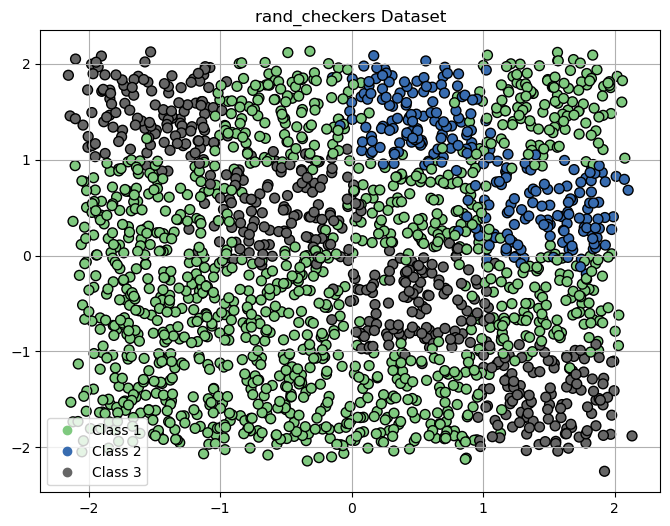

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import check_random_state

def rand_checkers(n_samples=2000, sigma=0.1, random_state=0):
    rng = check_random_state(random_state)
    nbp = n_samples // 16
    nbn = n_samples // 16
    xapp = rng.rand((nbp + nbn) * 16).reshape((nbp + nbn) * 8, 2)
    yapp = np.ones((nbp + nbn) * 8)
    idx = 0
    for i in range(-2, 2):
        for j in range(-2, 2):
            if ((i + j) % 2) == 0:
                nb = nbp
            else:
                nb = nbn
                yapp[idx:(idx + nb)] = [(i + j) % 3 + 1] * nb

            xapp[idx:(idx + nb), 0] = rng.rand(nb)
            xapp[idx:(idx + nb), 0] += i + sigma * rng.randn(nb)
            xapp[idx:(idx + nb), 1] = rng.rand(nb)
            xapp[idx:(idx + nb), 1] += j + sigma * rng.randn(nb)
            idx += nb

    ind = np.arange(xapp.shape[0])
    rng.shuffle(ind)
    res = np.hstack([xapp, yapp[:, np.newaxis]])
    return np.array(res[ind, :2]), np.array(res[ind, 2])

X, y = rand_checkers()

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent', edgecolor='k', s=50)
plt.title('rand_checkers Dataset')
plt.grid()
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1', 'Class 2', 'Class 3'])
plt.show()

We can see a 2D dataset where each point, defined by 2 features, belongs to one of 3 classes, represented by blue, green, and grey points. The points are arranged in a checkerboard pattern, with alternating regions dominated by one class. This creates a structured, non-linear distribution with clear but irregular class boundaries.

Overall, points are distributed uniformyl. In regions where the classes meet, points overlap, which is normal if they have been classified with K-NN.

#### Q16

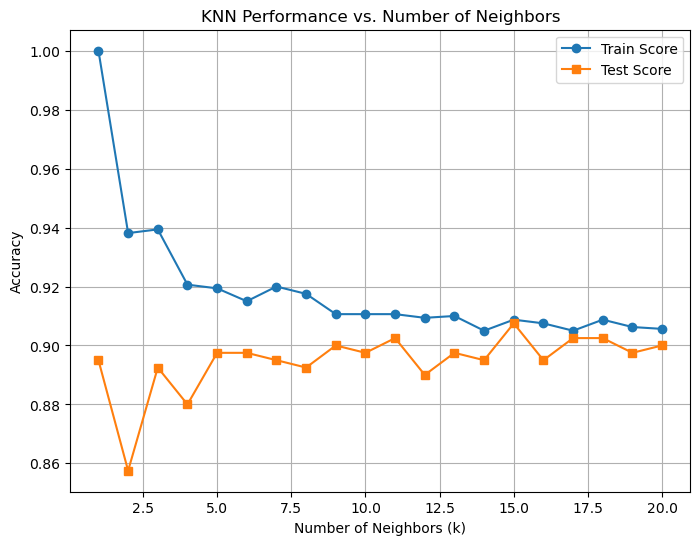

In [17]:
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = range(1, 21)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNearestNeighbor(k=k)
    # cross-validation score (avg score over 10 folds)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

plt.figure(figsize=(8, 6))
plt.plot(k_values, train_scores, label='Train Score', marker='o')
plt.plot(k_values, test_scores, label='Test Score', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Performance vs. Number of Neighbors')
plt.legend()
plt.grid()
plt.show()

We see that for $k=1$ the accuracy is at 1. $k=1$ means each data point is its own nearest neighbor, so the model perfectly fits the training data (no generalization). This indicates **overfitting**. The training accuracy decreases because more neighbors are included in the decision, leading to more generalized boundaries rather than perfectly fitting the training data, but it stabilizes for larger k values.

The testing accuracy is lower and fluctuates more significantly.
This is because small values of k lead to overfitting on the training data, causing the model to perform poorly on the test set (low generalization). The testing accuracy improves initially as the model starts generalizing better, reducing overfitting.
However, if k becomes too large, the model underfits because it averages over too many neighbors, including those that are far away and less relevant to the target data point.

### Exercise 2: Encoding and Hyperparameter Tuning with Optima

#### Q17

In [18]:
adult_census = pd.read_csv("https://www.openml.org/data/get_csv/1595261/adult-census.csv")
adult_census.dropna(inplace=True)

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

X = adult_census.drop(columns=['class'])
y = adult_census['class']

categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns

# Define train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define models
models = {
    'LogisticRegression': LogisticRegression(max_iter=5000, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=42)
}

In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from scipy.sparse import csr_matrix

dense_transformer = FunctionTransformer(lambda x: x.toarray() if isinstance(x, csr_matrix) else x)

# OneHot Encoding
one_hot_pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', Pipeline(steps=[
                ('scale', StandardScaler()),
            ]), numerical_columns),
            ('cat', Pipeline(steps=[
                ('onehot', OneHotEncoder(handle_unknown='ignore')),
                ('to_dense', dense_transformer)
            ]), categorical_columns)
        ])),
])

# Ordinal Encoding 
ordinal_pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', Pipeline(steps=[
                ('scale', StandardScaler())
            ]), numerical_columns),
            ('cat', Pipeline(steps=[
                ('ordinal', OrdinalEncoder())
            ]), categorical_columns)
        ])),
])

In [21]:
from sklearn.metrics import accuracy_score

# Function to train and evaluate models
def evaluate_models(pipeline, encoding_type, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        full_pipeline = Pipeline(steps=[
            ('preprocessing', pipeline),
            ('model', model)
        ])
        full_pipeline.fit(X_train, y_train)
        y_pred = full_pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[f'{name} ({encoding_type})'] = accuracy
    return results

In [22]:
# Evaluate both encoding strategies
one_hot_results = evaluate_models(one_hot_pipeline, "OneHot Encoding", X_train, X_test, y_train, y_test)
ordinal_results = evaluate_models(ordinal_pipeline, "Ordinal Encoding", X_train, X_test, y_train, y_test)

# Combine results
results = {**one_hot_results, **ordinal_results}

for model, accuracy in results.items():
    print(f"{model}: {accuracy:.4f}")

LogisticRegression (OneHot Encoding): 0.8550
RandomForest (OneHot Encoding): 0.8576
HistGradientBoosting (OneHot Encoding): 0.8765
LogisticRegression (Ordinal Encoding): 0.8277
RandomForest (Ordinal Encoding): 0.8605
HistGradientBoosting (Ordinal Encoding): 0.8772


Logistic regression performs better with one-hot encoding (0.8576) compared to ordinal encoding (0.8280). This is because one-hot encoding effectively handles categorical variables without introducing an artificial ordinal relationship. In contrast, ordinal encoding imposes an order on categorical data, which can negatively impact the model's performance.

For random forest, the performance is nearly the same with both encoding methods, although ordinal encoding achieves slightly higher accuracy than one-hot encoding. Ordinal encoding reduces the number of features compared to one-hot encoding, making the model less complex and less prone to overfitting.

Similarly, HistGradientBoosting performs almost equally well with both encoding strategies, with ordinal encoding showing a slight advantage (0.8772) over one-hot encoding (0.8765). The difference, however, is minimal. Gradient boosting models are inherently efficient at handling numerical and ordinal features, making them less sensitive to the choice of encoding.

In conclusion, ordinal encoding is more suitable for tree-based models like random forest and HistGradientBoosting, while one-hot encoding is better suited for linear models such as logistic regression, which significantly benefits from it. Among the models evaluated, HistGradientBoosting achieves the highest accuracy across both encoding strategies, demonstrating that it is the best model for this dataset.

#### Q18

In [23]:
import optuna
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Define the objective function for Optuna
def objective(trial):
    # Suggest a learning rate
    learning_rate = trial.suggest_loguniform("learning_rate", 0.01, 0.5)

    # Define the model with the suggested learning rate
    model = HistGradientBoostingClassifier(learning_rate=learning_rate, random_state=42)

    pipeline = Pipeline(steps=[
        ('preprocessing', ordinal_pipeline),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create an Optuna study and optimize
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # Perform 50 trials

# Finding the optimal learning rate and corresponding accurcay
best_learning_rate = study.best_params["learning_rate"]
best_accuracy = study.best_value

# Train the best model with the optimal learning rate
optimized_model = HistGradientBoostingClassifier(learning_rate=best_learning_rate, random_state=42)
optimized_pipeline = Pipeline(steps=[
    ('preprocessing', ordinal_pipeline),
    ('model', optimized_model)
])
optimized_pipeline.fit(X_train, y_train)
optimized_y_pred = optimized_pipeline.predict(X_test)
optimized_accuracy = accuracy_score(y_test, optimized_y_pred)

print(f"Optimized HistGradientBoostingClassifier Accuracy: {optimized_accuracy:.4f} (Learning Rate: {best_learning_rate:.4f})")

[I 2025-03-11 14:49:14,415] A new study created in memory with name: no-name-05ead8e4-38a9-418d-b064-87c24cc23c5d
/var/folders/1q/4p_js9jn14x3_527d5fmd8dr0000gn/T/ipykernel_91235/4092926628.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 0.01, 0.5)
[I 2025-03-11 14:49:15,302] Trial 0 finished with value: 0.8667849587115266 and parameters: {'learning_rate': 0.020133696922712555}. Best is trial 0 with value: 0.8667849587115266.
/var/folders/1q/4p_js9jn14x3_527d5fmd8dr0000gn/T/ipykernel_91235/4092926628.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 

Optimized HistGradientBoostingClassifier Accuracy: 0.8778 (Learning Rate: 0.0704)


The HistGradientBoosting classifier achieves the highest accuracy among the three models, with an accuracy of 0.8779. A learning rate of 0.0844, tuned with Optuna, played a key role in balancing the trade-off between convergence speed and generalization.

### Exercise 3: Processing Fuzzy Categorical Data

#### Q19

In [33]:
dfX = pd.read_csv("/Users/solalzana/Desktop/DSB PDS/Lab3 - sklearn & hyperparams tuning/data/skrub_data_lab3/salary_X.csv")
dfY = pd.read_csv("/Users/solalzana/Desktop/DSB PDS/Lab3 - sklearn & hyperparams tuning/data/skrub_data_lab3/salary_Y.csv")
dfX.set_index('Unnamed: 0', drop=True)
dfY.set_index('Unnamed: 0', drop=True)

current_annual_salary
Unnamed: 0                       
0                        69222.18
1                        97392.47
2                       104717.28
3                        52734.57
4                        93396.00
...                           ...
9223                     72094.53
9224                    169543.85
9225                    102736.52
9226                    153747.50
9227                     75484.08

[9228 rows x 1 columns]

In [34]:
dfX.head()
# dfX.dtypes

Unnamed: 0 gender department                              department_name  \
0           0      F        POL                         Department of Police   
1           1      M        POL                         Department of Police   
2           2      F        HHS      Department of Health and Human Services   
3           3      M        COR                Correction and Rehabilitation   
4           4      M        HCA  Department of Housing and Community Affairs   

                                            division assignment_category  \
0  MSB Information Mgmt and Tech Division Records...    Fulltime-Regular   
1         ISB Major Crimes Division Fugitive Section    Fulltime-Regular   
2      Adult Protective and Case Management Services    Fulltime-Regular   
3                         PRRS Facility and Security    Fulltime-Regular   
4                        Affordable Housing Programs    Fulltime-Regular   

       employee_position_title date_first_hired  year_first_hired  
0  Office Services Coordinator       09/22/1986              1986  
1        Master Police Officer       09/12/1988              1988  
2             Social Worker IV       11/19/1989              1989  
3       Resident Supervisor II       05/05/2014              2014  
4      Planning Specialist III       03/05/2007              2007

This dataset appears to be about employees and information about their job such as when they where hired, department name etc. and their corresponding annual salaries.

The goal here seems to be to predict the current_annual_salary (target variable) based on employee characteristics (features in X).

#### Q20

In [35]:
distinct_modalities = dfX.nunique()
distinct_modalities

Unnamed: 0                 9228
gender                        2
department                   37
department_name              37
division                    694
assignment_category           2
employee_position_title     443
date_first_hired           2264
year_first_hired             51
dtype: int64

If we consider using OneHotEncore, we should be careful with the columns `division` and `employee_position_title` which can make the dataset messy due to many different unique values, which would require adding 694+443 columns to this dataset! 

We should also be careful with `date_first_hired` and `year_first_hired` which are in string and integer format (not date) and which also contain a lot of different values.

#### Q21

The mmodalities are unnordered and numerous. However, there exists a notion of distance (or hierarchy here). The roman letters after the job title seem to infer the hierarchy level, and this could lead us to think that a GapEncoder may be better as it captures similaerities in strings that the OneHotEncoder could not capture (one difference in the string and OHE creates a new column, whereas GapEncore outputs in fewer dimensions and captures text similarities).

#### Q22

In [ ]:
# !pip install skrub

In [36]:
from skrub import GapEncoder

data = pd.Series([
    "Math, optimization",
    "mathematics",
    "maths, ml",
    "ml.maths",
    "machine learning",
    "physics",
    "phy",
    "statistical physics",
    "computational phys."
])

gap_encoder = GapEncoder(n_components=2) # we ask it to learn 2 components (we'll get 2 columns in the trasnformed output)
gap_encoder.fit(data)

print("Transformed Data:")
print(gap_encoder.transform(data))


clean_data = pd.Series(["physics"])
dirty_data = pd.Series(["physcis"])

clean_encoded = gap_encoder.transform(clean_data)
dirty_encoded = gap_encoder.transform(dirty_data)

print("Clean Encoded:", clean_encoded)
print("Dirty Encoded:", dirty_encoded)

print("Learned Components:")
print(gap_encoder.n_components)


Transformed Data:
   statistical, computational, physics  optimization, learning, machine
0                             0.070546                        24.029454
1                             0.108293                        13.491707
2                             0.051975                        10.548025
3                             0.051977                         9.048023
4                             0.052841                        21.047159
5                             7.546280                         0.053720
6                             1.549872                         0.050128
7                            25.541454                         0.058546
8                            25.531526                         0.068474
Clean Encoded:    statistical, computational, physics  optimization, learning, machine
0                              7.54628                          0.05372
Dirty Encoded:    statistical, computational, physics  optimization, learning, machine
0               

Is the change in behavior good or bad ?

Well the encoder seems capture the semantic similarity between the clean and dirty inputs to some extent (as the second component doesn't change much), but the significant difference in the first component indicates that the encoder struggles to fully associate "physcis" with "physics".

For applications that rely on robust handling of typos or dirty data, this discrepancy might lead to issues. This behavior can be useful if the dirty data is semantically related but doesn't have an exact match (eg variations like "math" vs "mathematics").

`n_components` refers to the number of latent topics the GapEncoder identifies in the categorical data.
In this case, `n_components=2` means the encoder has learned two latent topics.
- First topic: "statistical, computational, physics"
- Second topic: "learning, machine, maths"

#### Q23

In [37]:
dfY

Unnamed: 0  current_annual_salary
0              0               69222.18
1              1               97392.47
2              2              104717.28
3              3               52734.57
4              4               93396.00
...          ...                    ...
9223        9223               72094.53
9224        9224              169543.85
9225        9225              102736.52
9226        9226              153747.50
9227        9227               75484.08

[9228 rows x 2 columns]

In [38]:
from sklearn.ensemble import HistGradientBoostingRegressor
from skrub import TableVectorizer

X = dfX.copy()
y = dfY['current_annual_salary']

pipeline = Pipeline([
    ('vectorizer', TableVectorizer()),
    ('regressor', HistGradientBoostingRegressor())
])

pipeline.fit(X, y)
fitted_table_vectorizer = pipeline.named_steps['vectorizer']

print("Attributes of fitted TableVectorizer:")
print("Columns:",fitted_table_vectorizer.get_feature_names_out())

Attributes of fitted TableVectorizer:
Columns: ['Unnamed: 0' 'gender_F' 'gender_M' 'gender_nan' 'department_BOA'
 'department_BOE' 'department_CAT' 'department_CCL' 'department_CEC'
 'department_CEX' 'department_COR' 'department_CUS' 'department_DEP'
 'department_DGS' 'department_DHS' 'department_DLC' 'department_DOT'
 'department_DPS' 'department_DTS' 'department_ECM' 'department_FIN'
 'department_FRS' 'department_HCA' 'department_HHS' 'department_HRC'
 'department_IGR' 'department_LIB' 'department_MPB' 'department_NDA'
 'department_OAG' 'department_OCP' 'department_OHR' 'department_OIG'
 'department_OLO' 'department_OMB' 'department_PIO' 'department_POL'
 'department_PRO' 'department_REC' 'department_SHF' 'department_ZAH'
 'department_name_Board of Appeals Department'
 'department_name_Board of Elections'
 'department_name_Community Engagement Cluster'
 'department_name_Community Use of Public Facilities'
 'department_name_Correction and Rehabilitation'
 "department_name_County Attor

We can see that the Table Vectorizer makes the difference between low and high cardinality to see when to apply one or the other.

Here, fit successfully sorted all modalities into "folders", restraining the dimension of the dataset.